In [246]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

In [247]:
# data from excel sheet... ID = [no answer, prefered, acceptable, avoid]
TA_data = [[1,True,"Time",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[2,True,"Time",2,2,2,1,2,1,2,1,3,2,3,2,2,2,3,3,3,3,3,3,3,3,3],
[3,False,"Course",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[4,True,"Time",3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,3,1,3,3,3],
[5,True,"Course",3,2,3,2,2,1,3,2,2,2,2,2,1,2,3,3,2,2,3,3,2,3,3],
[6,True,"Course",2,2,3,1,3,1,3,1,2,3,2,1,2,1,3,2,2,3,3,3,2,3,3],
[7,True,"Time",3,3,3,3,3,2,2,1,1,2,1,1,2,1,2,3,2,3,3,3,3,3,3],
[8,True,"Time",3,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
[9,True,"Course",1,2,2,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
[10,True,"Course",0,0,0,0,0,2,0,0,0,0,2,0,2,0,0,0,0,1,1,0,0,0,0],
[11,True,"Course",3,3,3,2,3,2,3,1,3,3,2,2,1,2,2,3,2,2,1,3,1,3,3],
[12,True,"Course",3,3,2,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
[13,True,"Course",3,3,3,3,2,1,2,2,1,1,3,2,3,2,1,1,1,3,3,3,3,1,1],
[14,True,"Course",1,2,2,2,3,0,2,1,2,3,3,2,3,2,3,3,2,3,3,3,3,3,3],
[15,True,"Time",3,3,3,3,3,2,3,2,3,3,3,2,3,3,3,3,1,3,3,3,3,3,2],
[16,True,"Course",1,1,1,1,1,3,3,3,3,1,3,3,3,3,3,3,3,1,3,3,3,3,3],
[17,True,"Time",1,1,1,1,0,1,0,1,3,3,3,2,3,3,3,3,3,3,3,2,3,3,3],
[18,True,"Course",3,2,2,1,2,1,3,1,1,2,1,1,1,1,1,3,1,3,3,3,1,3,0],
[19,True,"Course",3,3,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,3,3,3,3,3],
[20,True,"Time",1,2,1,3,3,3,3,2,3,3,3,2,3,1,3,2,1,3,3,1,3,3,1],
[21,True,"Course",1,2,3,3,3,1,3,2,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3],
[22,False,"Course",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[23,True,"Time",3,2,2,2,3,1,3,2,3,3,3,1,3,1,3,3,2,3,3,0,3,3,3],
[24,True,"Course",3,3,3,2,2,2,3,1,3,2,2,1,2,1,3,2,2,3,2,2,3,3,2],
[25,True,"Time",2,1,2,1,3,3,2,2,3,2,2,2,3,3,3,2,2,3,3,3,3,3,3],
[26,True,"Course",2,2,3,3,3,1,2,1,2,3,2,1,2,1,3,3,1,3,3,1,3,3,3],
[27,True,"Course",3,2,2,2,2,1,0,1,1,2,1,1,2,1,1,2,2,3,3,2,3,3,3],
[28,True,"Course",3,3,3,3,3,2,3,2,2,3,2,1,1,1,1,1,1,3,3,3,1,2,3],
[29,True,"Course",2,2,2,2,2,2,3,1,2,2,1,3,1,3,2,3,1,3,3,3,2,3,3],
[30,False,"Course",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[31,True,"Time",2,1,1,1,3,1,1,1,1,3,2,1,3,1,1,1,1,3,3,1,3,3,0],
[32,True,"Time",3,2,3,2,2,1,3,2,1,2,3,1,3,2,2,2,1,3,3,1,3,2,1],
[33,True,"Course",3,3,3,2,3,1,3,1,1,3,3,2,3,2,1,3,1,3,1,0,3,3,3],
[34,True,"Course",3,3,2,2,2,1,2,2,3,2,3,2,3,3,3,2,2,3,3,3,3,3,3],
[35,True,"Time",3,3,3,3,2,1,2,1,3,3,1,1,1,1,3,3,3,2,2,2,2,3,3],
[36,True,"Course",3,3,3,3,2,2,3,1,1,1,3,1,3,1,1,1,1,3,3,1,3,2,3],
[37,False,"Course",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[38,True,"Time",3,3,3,3,3,2,0,2,2,2,2,1,2,1,1,1,1,3,2,3,3,3,3],
[39,True,"Course",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[40,True,"Course",3,3,2,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3,0],
[41,True,"Time",1,1,2,3,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
[42,True,"Course",3,3,3,3,3,2,3,1,3,3,3,1,3,1,3,3,1,3,3,3,3,3,3],
[43,True,"Course",2,2,1,1,1,1,3,2,1,1,3,3,3,3,1,1,1,3,3,3,3,1,2],
[44,True,"Time",2,1,2,1,3,3,3,1,1,3,3,1,3,1,2,3,1,3,3,3,3,3,3],
[45,True,"Course",2,1,2,1,3,2,2,2,2,3,3,2,3,3,3,3,2,3,3,3,3,3,3],
[46,True,"Time",2,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
[47,True,"Course",3,3,3,1,1,1,1,2,2,2,2,3,2,3,1,2,3,3,1,3,3,2,3],
[48,True,"Course",1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
[49,True,"Course",3,2,3,2,2,1,3,3,3,3,3,3,3,3,2,3,2,3,3,3,3,3,1],
[50,True,"Course",1,1,2,2,2,1,3,2,2,3,1,3,3,3,2,3,3,3,3,3,3,3,3],
[51,True,"Course",3,3,3,3,3,3,3,3,1,3,1,3,3,3,1,2,3,2,3,3,3,3,3],
[52,True,"Time",2,2,2,2,2,2,1,2,2,2,3,1,3,1,2,2,2,2,3,1,3,3,3],
[53,True,"Course",3,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3,3,3,3],
[54,True,"Course",3,3,3,3,3,3,3,1,1,3,3,3,3,3,1,2,3,3,3,3,3,2,3],
[55,True,"Course",3,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3],
[56,True,"Time",3,3,3,1,2,1,3,2,2,2,0,1,0,0,2,1,1,0,0,0,0,0,0],
[57,True,"Course",3,2,2,2,2,1,2,2,1,1,2,3,1,3,1,1,1,1,1,3,3,2,2],
[58,True,"Time",0,2,2,2,2,3,0,1,1,1,3,1,3,1,1,1,1,3,1,1,3,1,1],
[59,True,"Course",1,2,3,1,3,3,2,2,3,3,3,2,3,1,3,3,3,3,3,3,3,3,3],
[60,True,"Course",2,2,3,3,3,1,2,1,3,3,3,3,2,3,3,3,3,3,2,3,3,3,3],
[61,True,"Time",2,1,3,2,3,2,2,1,2,2,3,1,3,1,2,2,2,3,3,1,3,3,3],
[62,True,"Time",3,2,3,2,2,3,0,3,3,2,3,2,3,3,3,3,2,3,3,3,3,3,1],
[63,True,"Time",2,1,3,1,2,2,3,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3],
[64,True,"Time",1,2,3,1,3,1,2,1,3,3,1,1,1,1,3,3,2,3,3,3,3,3,3],
[65,True,"Course",3,3,3,3,3,2,3,2,2,3,2,1,2,1,3,3,2,3,3,3,3,3,3],
[66,True,"Course",1,2,2,2,3,2,3,1,3,3,1,2,1,2,3,3,3,3,3,3,1,3,3],
[67,True,"Time",3,2,2,2,2,1,2,1,3,2,1,2,2,1,3,3,2,2,2,2,1,3,3],
[68,True,"Course",3,3,3,3,3,2,3,1,1,1,1,2,1,2,1,1,1,1,1,3,2,2,2],
[69,True,"Course",1,2,2,2,3,1,1,2,2,3,1,2,3,3,2,3,1,3,3,1,3,3,1],
[70,True,"Course",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[71,True,"Course",3,3,3,3,3,3,2,1,1,2,3,1,3,2,2,2,2,3,3,2,3,3,3],
[72,True,"Course",3,3,3,2,2,3,3,2,3,3,3,3,3,3,3,3,1,3,3,3,3,3,3],
[73,True,"Time",3,2,1,1,1,1,3,1,0,0,2,0,0,0,0,0,0,2,1,0,0,0,0],
[74,True,"Course",3,3,2,2,3,1,2,2,3,2,2,2,1,1,2,2,2,2,2,3,1,3,3],
[75,True,"Time",3,3,2,2,2,1,1,2,1,2,2,1,2,1,1,1,2,2,2,2,2,1,2],
[76,True,"Course",3,3,3,2,3,2,3,2,1,1,1,1,1,2,2,2,3,3,3,3,3,3,3],
[77,True,"Time",2,2,2,2,2,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
[78,True,"Course",2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],
[79,True,"Time",0,3,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[80,True,"Course",3,3,3,3,3,3,3,1,3,3,3,1,1,1,3,3,1,3,3,3,3,3,3],
[81,True,"Time",2,2,3,2,2,1,2,3,3,3,1,2,1,2,3,3,3,2,3,3,3,2,3],
[82,True,"Course",3,3,3,3,3,3,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
[83,True,"Time",3,3,3,3,3,1,3,3,2,2,3,1,3,1,3,3,3,3,3,3,3,3,3]]

In [248]:
# Clean up Raw data
TA_data_effective = np.array([ta for ta in TA_data if ta[1]]) # Only include those who want to TA this term
TA_ids = TA_data_effective[:, 0]
TA_prefs = TA_data_effective[:, 3:].astype(int)  # Remove non-preference columns and convert to int
print("Total active TAs", len(TA_ids))

Total active TAs 79


In [255]:
# List of course numbers from the TA prefs sheet
COURSES = [120,124,125,126,134,208,"IC",300,327,334,381,402,407,411,424,427,441,464,491,504,514,534,544]

# Interpretation of TA preferences
PREFERENCE_MAP = {
    0: "No answer",
    1: "Prefered",
    2: "Acceptable",
    3: "Avoid"
}
# Note: we could easily use this in the other direction to go straight from a csv/excel file

# List of number of sections per course, REARRANGED TO MATCH COURSES, with 124 REDUCED so the totals match
# Although this algorhithm *can* handle having too many sections for the # of TAs
section_counts = [6,17,13,14,1,6,1,3,2,1,1,1,2,1,1,2,2,1,1,1,1,0,1]
print("Total number of sections:", sum(section_counts))

for x in range(len(COURSES)):
    print(f"MATH {COURSES[x]} has {section_counts[x]} sections")

# Create list of all sections, where each course index appears as many times as it has sections
all_sections = []
for index in range(len(section_counts)):
    for x in range(section_counts[index]):
        all_sections.append(index)

print(all_sections)

Total number of sections: 79
MATH 120 has 6 sections
MATH 124 has 17 sections
MATH 125 has 13 sections
MATH 126 has 14 sections
MATH 134 has 1 sections
MATH 208 has 6 sections
MATH IC has 1 sections
MATH 300 has 3 sections
MATH 327 has 2 sections
MATH 334 has 1 sections
MATH 381 has 1 sections
MATH 402 has 1 sections
MATH 407 has 2 sections
MATH 411 has 1 sections
MATH 424 has 1 sections
MATH 427 has 2 sections
MATH 441 has 2 sections
MATH 464 has 1 sections
MATH 491 has 1 sections
MATH 504 has 1 sections
MATH 514 has 1 sections
MATH 534 has 0 sections
MATH 544 has 1 sections
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 8, 8, 9, 10, 11, 12, 12, 13, 14, 15, 15, 16, 16, 17, 18, 19, 20, 22]


In [250]:
# duplicate columns of TA_prefs according to number of sections in each course
TA_prefs_duped = np.zeros((len(TA_prefs), len(all_sections)))
for i in range(TA_prefs_duped.shape[0]):
    for j in range(TA_prefs_duped.shape[1]):
        TA_prefs_duped[i][j] = TA_prefs[i][all_sections[j]]

Number of TAs assigned to preference level 0 (No answer): 2
Number of TAs assigned to preference level 1 (Prefered): 58
Number of TAs assigned to preference level 2 (Acceptable): 19
Number of TAs assigned to preference level 3 (Avoid): 0



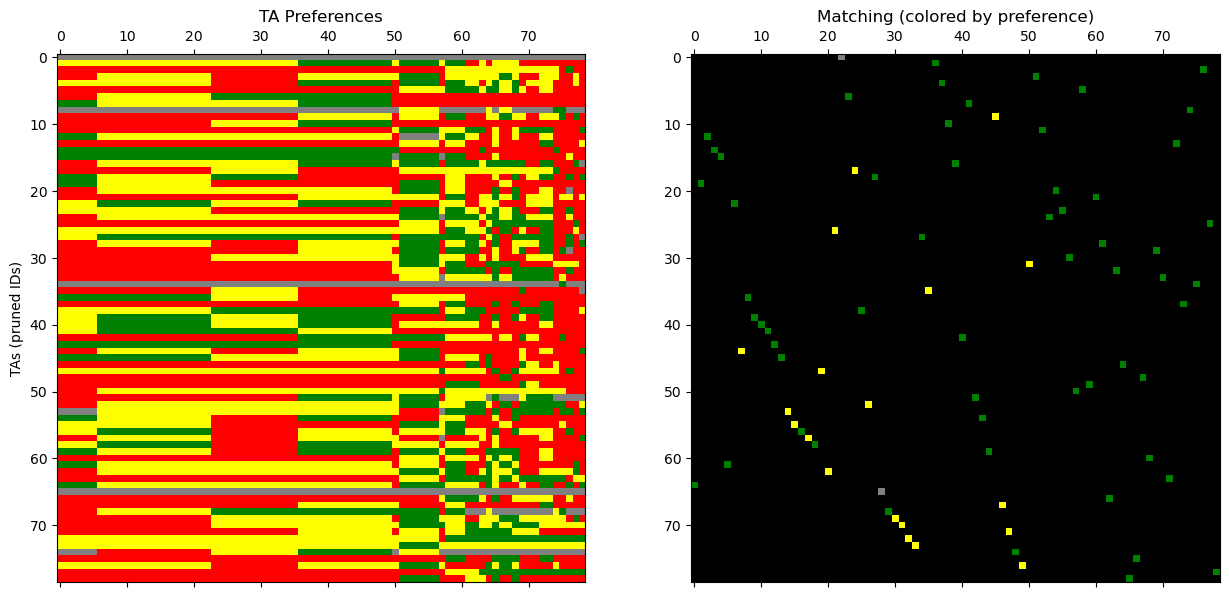

In [258]:
# Adjust the weights for the matching algorithm
TA_prefs_adjusted = np.copy(TA_prefs_duped)
TA_prefs_adjusted[TA_prefs_adjusted == 0] = 2.5  # Make "no answer" into between "acceptable" and "avoid"
# Note: messing around with these costs don't seem to change the results much

### This is where we'd add manual adjustments to the preferences:
# TA_prefs_adjusted[0,57] = -1000  # Force TA with ID 1 to get section 50 (IC) AS AN EXAMPLE of FORCING a match
# TA_prefs_adjusted[78,65] = 1000  # Force TA with ID 83 out of section 64 (402) AS AN EXAMPLE of PREVENTING a match

# Match using linear sum assignment (minimize)
real_matches = np.array(linear_sum_assignment(TA_prefs_adjusted, maximize=False)).T

import matplotlib
preference_colors = matplotlib.colors.ListedColormap(['grey', 'green', 'yellow', 'red'])
preference_colors_with_mask = matplotlib.colors.ListedColormap(['black', 'grey', 'green', 'yellow', 'red'])

# Creat the matrix to visualize the matches
real_matching_matrix = np.zeros_like(TA_prefs_duped)
happiness = [0, 0, 0, 0]
for ta, section in real_matches:
    real_matching_matrix[ta, section] = 1
    happiness[int(TA_prefs_duped[ta, section])] += 1

# Print out the total number of TAs assigned to each preference level
for level in range(4):
    print(f"Number of TAs assigned to preference level {level} ({PREFERENCE_MAP[level]}): {happiness[level]}")

fig, ax = plt.subplots(1, 2, figsize=(15, 40))
ax[0].matshow(TA_prefs_duped, cmap=preference_colors, vmin=0, vmax=3)
ax[1].matshow(real_matching_matrix*(TA_prefs_duped+np.ones_like(TA_prefs_duped)), cmap=preference_colors_with_mask, vmin=0, vmax=4)
ax[0].set_title("TA Preferences")
ax[1].set_title("Matching (colored by preference)")
ax[0].set_ylabel("TAs (pruned IDs)")
print()

In [252]:
# Print TA assignments
real_matches = sorted(real_matches, key=lambda x: int(TA_ids[x[0]])) # Sort by TA id
for ta, section in real_matches:
    print(f"TA ID {TA_ids[ta]} gets Section {section} (MATH {COURSES[all_sections[section]]})"
            f" with preference {PREFERENCE_MAP[TA_prefs_duped[ta, section]]}")

TA ID 1 gets Section 22 (MATH 124) with preference No answer
TA ID 2 gets Section 36 (MATH 126) with preference Prefered
TA ID 4 gets Section 76 (MATH 504) with preference Prefered
TA ID 5 gets Section 51 (MATH 208) with preference Prefered
TA ID 6 gets Section 37 (MATH 126) with preference Prefered
TA ID 7 gets Section 58 (MATH 300) with preference Prefered
TA ID 8 gets Section 23 (MATH 125) with preference Prefered
TA ID 9 gets Section 41 (MATH 126) with preference Prefered
TA ID 10 gets Section 74 (MATH 464) with preference Prefered
TA ID 11 gets Section 45 (MATH 126) with preference Acceptable
TA ID 12 gets Section 38 (MATH 126) with preference Prefered
TA ID 13 gets Section 52 (MATH 208) with preference Prefered
TA ID 14 gets Section 2 (MATH 120) with preference Prefered
TA ID 15 gets Section 72 (MATH 441) with preference Prefered
TA ID 16 gets Section 3 (MATH 120) with preference Prefered
TA ID 17 gets Section 4 (MATH 120) with preference Prefered
TA ID 18 gets Section 39 (MATH 1

In [253]:
# Print Course assignments
for course in range(len(COURSES)):
    this_course_TAs = []
    for ta, section in real_matches:
        if all_sections[section] == course:
            this_course_TAs.append(TA_ids[ta])
    print(f"MATH {COURSES[course]} has TAs: {' '.join(this_course_TAs)}")

MATH 120 has TAs: 14 16 17 21 66 69
MATH 124 has TAs: 1 25 29 41 44 45 46 48 49 50 52 58 60 61 62 63 67
MATH 125 has TAs: 8 19 20 31 40 43 57 70 73 74 75 77 78
MATH 126 has TAs: 2 6 9 11 12 18 47 56 59 64 72 76 79 81
MATH 134 has TAs: 35
MATH 208 has TAs: 5 13 23 26 27 34
MATH IC has TAs: 55
MATH 300 has TAs: 7 24 54
MATH 327 has TAs: 32 71
MATH 334 has TAs: 36
MATH 381 has TAs: 51
MATH 402 has TAs: 83
MATH 407 has TAs: 53 80
MATH 411 has TAs: 65
MATH 424 has TAs: 33
MATH 427 has TAs: 38 68
MATH 441 has TAs: 15 42
MATH 464 has TAs: 10
MATH 491 has TAs: 39
MATH 504 has TAs: 4
MATH 514 has TAs: 28
MATH 534 has TAs: 
MATH 544 has TAs: 82
